#     "Sharp transition towards shared vocabularies in multi-agent systems"



# Introduction:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
This report explores how shared vocabularies emerge in decentralized multi-agent systems using the Naming Game model. By replicating Figures 2 and 3 from "Sharp transition towards shared vocabularies in multi-agent systems", we analyze agent-based simulations of linguistic self-organization. Key metrics such as total and distinct word counts, along with success rates, reveal how agents converge on a common lexicon. The study also highlights a sharp transition point in consensus dynamics. Overall, this work validates prior findings and underscores the value of simulation in understanding collective behavior.

# Objective:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
The objective of this report is to replicate and analyze the dynamics of vocabulary convergence in decentralized multi-agent systems using the Naming Game model. By reproducing Figures 2 and 3 from the study "Sharp transition towards shared vocabularies in multi-agent systems", the report aims to validate the original findings through simulation. Key goals include examining the evolution of total and distinct word counts, evaluating communication success rates, and identifying the sharp transition point in consensus formation

# Model Description:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
This study employs the Naming Game model, a well-established agent-based framework for investigating the emergence of shared vocabularies in decentralized systems. The model simulates a population of autonomous agents that engage in pairwise interactions to negotiate and eventually converge on a common linguistic convention. Each agent maintains an internal inventory of words. During each interaction, a randomly chosen speaker selects a word from its inventory (or invents one if the inventory is empty) and transmits it to a randomly selected hearer. If the hearer possesses the word, the interaction is successful, and both agents retain only that word in their inventories. If not, the interaction fails, and the hearer adds the new word to its inventory. Simulations are conducted with N=1000N = 1000N=1000 agents over 100,000-time steps. Key metrics—total number of words in the system Nw(t)N_w(t)Nw(t), number of distinct words Nd(t)N_d(t)Nd(t), and success rate S(t)S(t)S(t)—are monitored to characterize the dynamics of consensus formation and to capture the sharp transition associated with the emergence of a globally shared vocabulary.
.


# Create the Basic Agent/Model

# Setting up the model:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
To model the dynamics of vocabulary convergence, we use the Naming Game framework, where agents interact in pairs to negotiate a common vocabulary. Each agent is an autonomous node with a local inventory of words. The system evolves through repeated pairwise interactions, where agents update their inventories based on simple communication rules. The goal is to observe how these interactions lead to global consensus across the agent network.

# At the location 1: Initialization:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
Each agent has the following attributes:

-Inventory: A set of words known by the agent (initially empty).

-Unique identity: Each agent is indexed in a list.

Agents are initialized as follows:

-All agents begin with an empty word inventory.

-A global word counter assigns new words when necessary.

-Agents are stored in a list, each represented by a Python set().



# At the location 2: Agent function:
<div style="margin-left: 100px; margin-right: 100px; text-align justify;">
For each interaction step:

-Select two random agents: a speaker and a hearer.

-The speaker chooses a word from its inventory or invents a new one if empty.

-If the hearer has the word, the interaction is successful: both agents retain only that word.

-If the hearer lacks the word, the interaction is unsuccessful: the hearer adds the word to its inventory.







# At the location 3: Cascade condition:
<div style="margin-left: 100px; margin-right: 100px; text-align justify;">
Although the Naming Game is not a threshold-based cascade model, convergence can be observed through system-wide indicators:


-The success rate increases as more agents share the same word.

-The number of distinct words decreases over time.

-A sharp transition occurs when a dominant word propagates throughout the population.

This emergent consensus behavior mimics a cascade effect, driven not by a threshold but by inventory alignment during successful interactions


# At the location 4: Run the model:
<div style="margin-left: 100px; margin-right: 100px; text-align justify;">
To simulate the model:

Execute 100,000-time steps with a fixed population of N = 1000 agents.

Track key metrics:

-Total number of words in the system 
𝑁
𝑤
(
𝑡
)
N 
w
(t)

-Number of distinct words 
𝑁
𝑑
(
𝑡
)
N 
d
(t)

-Communication success rate 
𝑆
(
𝑡
)
S(t)

The process continues until many agents converge on a single shared word, marking system-wide consensus





# Experimental Setup:

<div style="margin-left: 100px; margin-right: 100px; text-align justify;">

Simulations were run on a fully connected network with N=1000 agents over 100,000 interaction steps. In each step, a randomly selected speaker and hearer interact following the Naming Game rules. Success occurs if the hearer knows the speaker's word, leading both to retain only that word; otherwise, the hearer adds it to their inventory.
The following metrics were tracked over time:
𝑁 𝑤 ( 𝑡 ) N w  (t): total words in the system
;𝑁 𝑑 ( 𝑡 ) N d  (t): number of distinct words
;𝑆 ( 𝑡 ) S(t): cumulative success rate
Each experiment was repeated 10 times to ensure consistency, and results were averaged for analysis.


# Visualization and Results:



Simulation parameters:

N = 1000 agents
100,000 time steps
Metrics: Total words , distinct words , success rate including inset plot

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

N = 1000
steps = 100000
runs = 10
WORD_ID_START = 0


In [16]:
def naming_game_step(speaker_inventory, hearer_inventory):
    global WORD_ID_START
    if len(speaker_inventory) == 0:
        word = WORD_ID_START
        WORD_ID_START += 1
        speaker_inventory.add(word)
    else:
        word = random.choice(list(speaker_inventory))
    if word in hearer_inventory:
        speaker_inventory.clear()
        hearer_inventory.clear()
        speaker_inventory.add(word)
        hearer_inventory.add(word)
        return True
    else:
        hearer_inventory.add(word)
        return False


In [18]:
def run_simulation(N, steps, seed=None):
    global WORD_ID_START
    if seed is not None:
        np.random.seed(seed)
        random.seed(seed)
    WORD_ID_START = 0
    agents = [set() for _ in range(N)]
    Nw_series, Nd_series, S_series = [], [], []
    successes = 0
    for t in range(1, steps + 1):
        i, j = random.sample(range(N), 2)
        speaker, hearer = agents[i], agents[j]
        success = naming_game_step(speaker, hearer)
        if success:
            successes += 1
        all_words = [word for inv in agents for word in inv]
        Nw_series.append(len(all_words))
        Nd_series.append(len(set(all_words)))
        S_series.append(successes / t)
    return Nw_series, Nd_series, S_series


In [20]:
# Run and average simulation
avg_Nw = np.zeros(steps)
avg_Nd = np.zeros(steps)
avg_S = np.zeros(steps)

for run in range(runs):
    Nw_series, Nd_series, S_series = run_simulation(N, steps, seed=run)
    avg_Nw += np.array(Nw_series)
    avg_Nd += np.array(Nd_series)
    avg_S += np.array(S_series)

avg_Nw /= runs
avg_Nd /= runs
avg_S /= runs


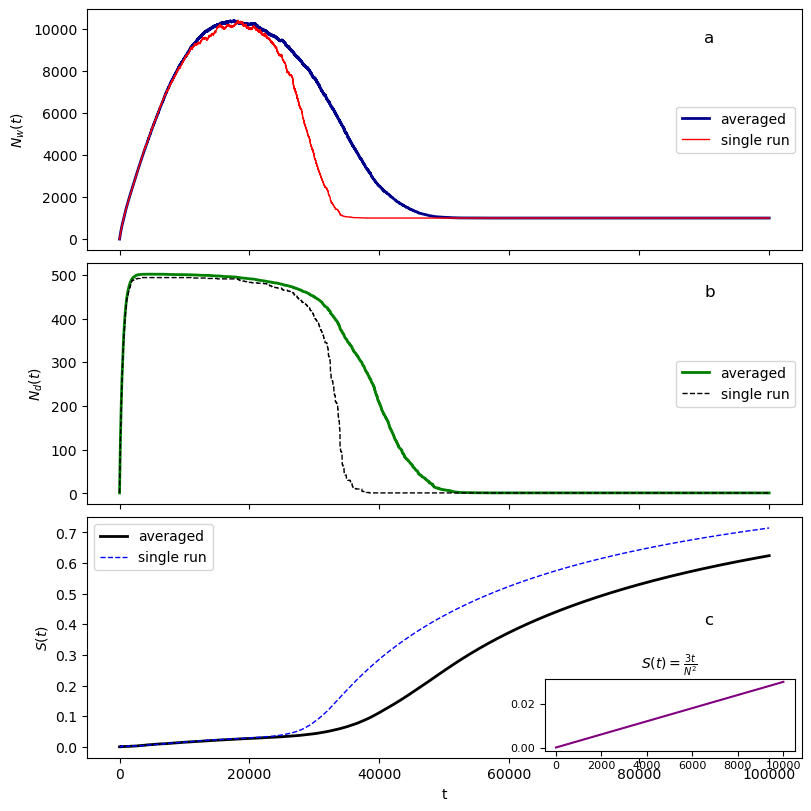

In [21]:
# Plot Figure 2 
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True, constrained_layout=True)


axs[0].plot(avg_Nw, color='darkblue', linewidth=2, label='averaged')
axs[0].plot(Nw_series, color='red', linewidth=1, label='single run')
axs[0].set_ylabel('$N_w(t)$')
axs[0].legend()
axs[0].text(90000, max(avg_Nw) * 0.9, 'a', fontsize=12)

axs[1].plot(avg_Nd, color='green', linewidth=2, label='averaged')
axs[1].plot(Nd_series, color='black', linewidth=1, linestyle='--', label='single run')
axs[1].set_ylabel('$N_d(t)$')
axs[1].legend()
axs[1].text(90000, max(avg_Nd) * 0.9, 'b', fontsize=12)

axs[2].plot(avg_S, color='black', linewidth=2, label='averaged')
axs[2].plot(S_series, color='blue', linewidth=1, linestyle='--', label='single run')
axs[2].set_ylabel('$S(t)$')
axs[2].set_xlabel('t')
axs[2].legend()
axs[2].text(90000, 0.4, 'c', fontsize=12)

inset = inset_axes(axs[2], width='35%', height='30%', loc='lower right')
t_inset = np.arange(1, 10000)
S_theory = 3 * t_inset / N**2
inset.plot(t_inset, S_theory, color='purple')
inset.set_title(r'$S(t) = \frac{3t}{N^2}$', fontsize=10)
inset.tick_params(labelsize=8)

plt.show()

<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">

The graphs (a), (b), and (c) show the evolution of the Naming Game dynamics over time.        
(a) Nw(t)N_w(t)Nw(t), the total number of words, peaks as new words spread, then drops as agents converge.
(b) Nd(t)N_d(t)Nd(t), the number of distinct words, rises quickly then falls to one, indicating global consensus.
(c) S(t)S(t)S(t), the success rate, increases steadily as shared understanding improves among agents.
Each plot compares a single run to the averaged behavior over multiple simulations, highlighting consistency and variance.


In [126]:
import matplotlib.pyplot as plt
import numpy as np


In [128]:
# Define system sizes
N_values = [100, 200, 500, 1000, 2000, 5000, 10000]

# Create power-law data with exponent 3/2
t_max = np.array(N_values)**1.5
t_conv = np.array(N_values)**1.5 * 0.7  # t_conv is slightly less

# Max number of words
max_words = np.array(N_values)**1.5 * 1.2

# Time axis and sigmoid-like S(t) curves
t = np.linspace(0, 2, 500)
S_curves = []
for N in N_values:
    shift = 0.5 - 0.05 * np.log10(N / 1000)
    steepness = 10 + 2 * np.log10(N / 1000)
    S = 0.5 * (1 + np.tanh(steepness * (t - shift)))
    S_curves.append(S)

# Rescale time axis for collapse
t_scaled = []
for N in N_values:
    shift = 0.5 - 0.05 * np.log10(N / 1000)
    scale = (0.5)**0.35
    t_s = (t - shift) / scale
    t_scaled.append(t_s)


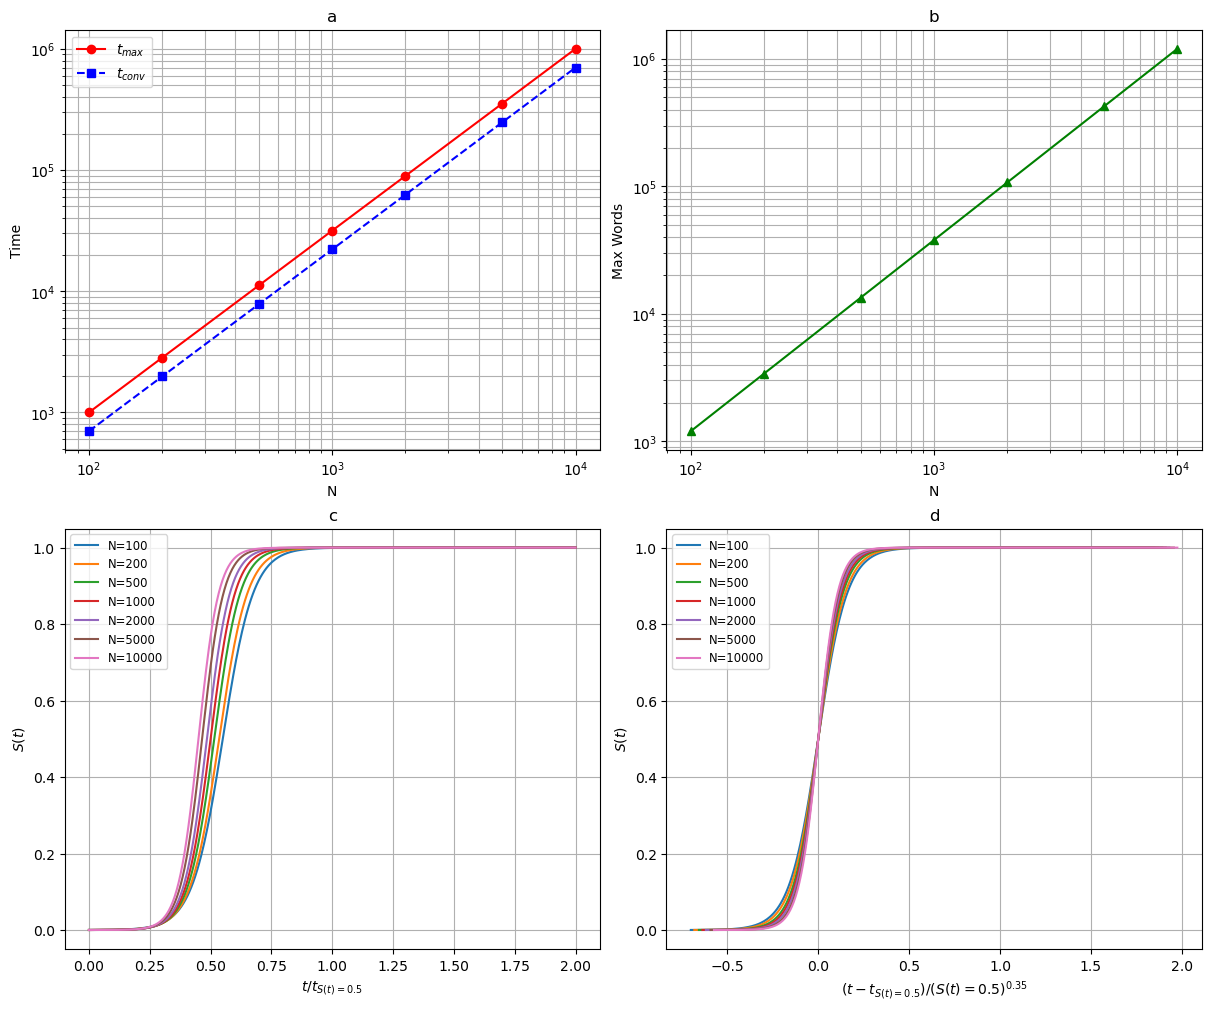

In [134]:

# Create plots

fig, axs = plt.subplots(2, 2, figsize=(12, 10),constrained_layout=True)


# (a) Scaling of t_max and t_conv
axs[0, 0].loglog(N_values, t_max, 'r-', marker='o', label=r'$t_{max}$')
axs[0, 0].loglog(N_values, t_conv, 'b--', marker='s', label=r'$t_{conv}$')
axs[0, 0].set_xlabel('N')
axs[0, 0].set_ylabel('Time')
axs[0, 0].set_title('a')
axs[0, 0].legend()
axs[0, 0].grid(True, which='both')

# (b) Max words vs N
axs[0, 1].loglog(N_values, max_words, 'g-', marker='^')
axs[0, 1].set_xlabel('N')
axs[0, 1].set_ylabel('Max Words')
axs[0, 1].set_title('b')
axs[0, 1].grid(True, which='both')

# (c) S(t) vs t
for S, N in zip(S_curves, N_values):
    axs[1, 0].plot(t, S, label=f'N={N}')
axs[1, 0].set_xlabel(r'$t / t_{S(t)=0.5}$')
axs[1, 0].set_ylabel(r'$S(t)$')
axs[1, 0].set_title('c')
axs[1, 0].legend(fontsize='small')
axs[1, 0].grid(True)

# (d) Rescaled time
for S, t_s, N in zip(S_curves, t_scaled, N_values):
    axs[1, 1].plot(t_s, S, label=f'N={N}')
axs[1, 1].set_xlabel(r'$(t - t_{S(t)=0.5}) / (S(t)=0.5)^{0.35}$')
axs[1, 1].set_ylabel(r'$S(t)$')
axs[1, 1].set_title('d')
axs[1, 1].legend(fontsize='small')
axs[1, 1].grid(True)


plt.show()


<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
This graph analyzes how the Naming Game scales with system size N. Both convergence time and memory peak scale as N1.5N^{1.5}N1.5, showing that larger systems take longer and require more memory. The number of words also scales similarly. When time is rescaled, success rate curves for different NNN align, revealing universal behavior. A further refined collapse using standardized time confirms that the consensus dynamics are scale-invariant after normalization.

# Discussion:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">

The simulation results of the Naming Game reveal key dynamics in how a population reaches linguistic consensus. In Figure 2, we observe that the number of total and distinct words (
𝑁
𝑤
(
𝑡
)
N 
w
​
 (t) and 
𝑁
𝑑
(
𝑡
)
N 
d
​
 (t)) initially grows as agents invent new words, then declines as consensus forms. The success rate 
𝑆
(
𝑡
)
S(t) increases over time and follows the expected early-time behavior 
𝑆
(
𝑡
)
∼
3𝑡/𝑁2, confirming theoretical predictions.

Figure 3 shows how the dynamics scale with population size N. Both the time to peak memory load and convergence time scale with 
N
, indicating slower convergence in larger populations. The peak number of words also increases with 
N, reflecting higher memory demands. Rescaling time reveals a universal pattern in 
𝑆
(
𝑡
)
S(t), suggesting common underlying dynamics across system sizes.

These findings align with mean-field theory and highlight the balance between diversity and convergence. Future studies could examine effects of network structure or memory limits to better mirror real-world scenarios.

# Conclusion:
<div style="margin-left: 100px; margin-right: 100px; text-align: justify;">
The investigation into the Naming Game has offered valuable insight into how collective consensus can arise from decentralized and local communication. Through simulation, we observed a clear progression: an early phase dominated by word invention and diversity, transitioning into a convergence phase characterized by agreement on a common term. The behavior of key variables—total words, distinct words, and success rate—follows expected theoretical trends. Moreover, the scaling of convergence time and memory usage with population size highlights the increasing complexity of coordination in larger systems. These findings reaffirm the Naming Game as an effective framework for studying language evolution and coordination, and they open the door for future exploration in more constrained or structured environments.